## mountaineer
**m**ountain **e**cology and **e**volution **r**evolution
##### A program to download, visualize, and compare species occurrence records across mountain ranges.

In [ ]:
import mountaineer
import folium

## Load data

In [ ]:
large = mountaineer.data.load('large')
large

In [ ]:
large.plot()

## Dataset and Region class objects

In [ ]:
# create instance of Dataset class, which stores a list of Region class objects for each row in the GeoDataFrame
l = mountaineer.Dataset(large)
l.gdf.plot()

In [ ]:
# view Region class by index (Himalaya)
print(l.regions[1].name)
l.regions[1].polygon

In [ ]:
# view Region class by index (West Coast)
print(l.regions[12].name)
l.regions[12].polygon

In [ ]:
west_coast = l.regions[12]
west_coast.polygon

# World dataset

In [ ]:
# Mountain polygons for "entire_world" (1,048 polygons)
world = mountaineer.data.load('world')
world

In [ ]:
# create instance of Dataset class for entire world
w = mountaineer.Dataset(world)
w.gdf.plot()
len(w.regions)

In [ ]:
# filter Dataset.regions by country
w.filter_country("United States of America")

In [ ]:
# filter Dataset.regions by name
w.filter_name("Abajo Peak")

In [ ]:
# select Region instance by index and store as new variable
abajo = w.regions[905]
print(abajo.name)
abajo.polygon

# Download species occurrences within Region

In [ ]:
# use 'pygbif' to get taxonKey info for taxon of interest
mountaineer.taxon_info('Lupinus argenteus')

In [ ]:
# query GBIF for 5 occurrences of 'Lupinus' within the complete polygon of this mountain range
abajo.get_occurrences(taxonKey=2963774, limit=5, tol=0)

In [ ]:
# query GBIF for all occurrences of 'Lupinus' within the complete polygon of this mountain range
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0)
abajo.polygon

In [ ]:
# query GBIF for all occurrences of 'Lupinus' within a simplified polygon of this mountain range (tol=0.05)
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0.05)
abajo.polygon.simplify(tolerance=0.05)

In [ ]:
# query GBIF for all occurrences of 'Lupinus' within a simplified polygon of this mountain range (tol=0.5)
a = abajo.get_all_occurrences(taxonKey=2963774, tol=0.5)
abajo.polygon.simplify(tolerance=0.5)

In [ ]:
# query GBIF for all occurrences of 'Plantae' within the complete polygon of this mountain range (tol=0)
a1 = abajo.get_all_occurrences(taxonKey=6, tol=0)

In [ ]:
# convert to df and filter
df = abajo.convert_json_to_dataframe(a)
df

In [ ]:
# save DataFrame of occurrence records to csv
mountaineer.save(df, 'abajo_plantae.csv')

In [ ]:
# plot occurrence records within Region
abajo.plot_with_mpl(df, region='Abajo Peak')

# Map with folium

In [ ]:
# load 'world' dataset
world = mountaineer.load('world')

In [ ]:
# init a map instance
fmap = folium.Map()

# create a layer to hold several features
region = folium.FeatureGroup(name="World")

# iterate over rows of 
for idx in world.index:
    
    # init a GeoJson object from each geometry datum and add to afghan layer
    data = folium.GeoJson(
        data=world.loc[idx, "geometry"],
        tooltip=world.loc[idx, "Name"],
    ).add_to(region)   
    
# add layer to the map
fmap.add_child(region)

# set bounds (location and zoom) on map to center on this region
fmap.fit_bounds(region.get_bounds())

# add layer toggle option
fmap.add_child(folium.LayerControl())

# show map
fmap

In [ ]:
# Mountains in the U.S.

# init a map instance
fmap = folium.Map(tiles="Stamen Terrain")

# create a layer to hold several features
region = folium.FeatureGroup(name="U.S. Mountains")

# iterate over rows of 
for idx in world[world.Country == "United States of America"].index:
    
    # init a GeoJson object from each geometry datum and add to afghan layer
    data = folium.GeoJson(
        data=world.loc[idx, "geometry"],
        tooltip=world.loc[idx, "Name"],
    ).add_to(region)   
    
# add layer to the map
fmap.add_child(region)

# set bounds (location and zoom) on map to center on this region
fmap.fit_bounds(region.get_bounds())

# add layer toggle option
fmap.add_child(folium.LayerControl())

# show map
fmap

In [ ]:
# Mountains in China

# init a map instance
fmap = folium.Map()

# create a layer to hold several features
region = folium.FeatureGroup(name="China")

# iterate over rows of 
for idx in world[world.Country == "China"].index:
    
    # init a GeoJson object from each geometry datum and add to afghan layer
    data = folium.GeoJson(
        data=world.loc[idx, "geometry"],
        tooltip=world.loc[idx, "Name"],
    ).add_to(region)   
    
# add layer to the map
fmap.add_child(region)

# set bounds (location and zoom) on map to center on this region
fmap.fit_bounds(region.get_bounds())

# add layer toggle option
fmap.add_child(folium.LayerControl())

# show map
fmap

### explicit use of Region class object (rather than creating list of regions with Dataset instance)

In [ ]:
w.filter_name('Hengduan Shan')

In [ ]:
hengduan = w.regions[236]

In [ ]:
hengduan = mountaineer.Region(name="Hengduan Shan", polygon=world.geometry[world.Name == "Hengduan Shan"])
hengduan

# Hengduan example

In [ ]:
hengduan = w.regions[236]

In [ ]:
mountaineer.taxon_info('Pedicularis')

In [ ]:
h = hengduan.get_all_occurrences(taxonKey=3171670, tol = 0.5)
hengduan.polygon

In [ ]:
df = hengduan.convert_json_to_dataframe(h)
df

In [ ]:
json = df.to_json()
json

In [ ]:
mountaineer.save(df, 'hengduan_pedicularis')

In [ ]:
hengduan.plot_with_mpl(df, 'Hengduan Shan')

# Geographical vector objects
## https://eaton-lab.org/hack-the-planet/tutorials/25.1-folium-vectors.html

In [1]:
import folium
import geopandas
import shapely
import pyproj
import geojson

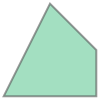

In [3]:
# create a Point instance
shapely.geometry.Point(44.0, -74.5)

# create a Polygon instance
shapely.geometry.Polygon([
    (44.0, -74), (45.0, -75), (45.0, -76), (43.0, -76),
])

In [4]:
# create two points
point1 = shapely.geometry.Point(44.0, -74.5)
point2 = shapely.geometry.Point(43.0, -73.5)

# get linear distance between points
linear_dist = point1.distance(point2)
print(f"linear unit-less distance: {linear_dist:.2f}")

linear unit-less distance: 1.41


In [5]:
# get geodetic (great circle) projection object
geod = pyproj.Geod(ellps='WGS84')

# get results of projecting points to new space
angle1, angle2, distance = geod.inv(point1.x, point1.y, point2.x, point2.y)

# print results (divide by 1000 to get in units of kms)
print(f"WGS84 distance in Kilometers: {distance / 1000:.2f}")

WGS84 distance in Kilometers: 115.77
